<a href="https://colab.research.google.com/github/Amit80007/Fine-Grained-Image-Classification/blob/master/Fine_Grained_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai import metrics

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
data = untar_data(URLs.PETS); data

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [6]:
data.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_img=data/'images'
path_ann= data/'annotations'

In [8]:
doc(ImageDataBunch)

In [0]:
bs=64
image_files=get_image_files(path_img)
pat = r'/([^/]+)_\d+.jpg$'
images=ImageDataBunch.from_name_re(path_img,image_files,pat,ds_tfms=get_transforms(),size=224,bs=bs).normalize(imagenet_stats)

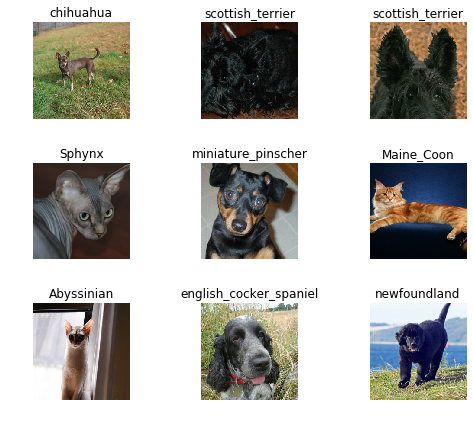

In [13]:
images.show_batch(rows=3, figsize=(7,6))

In [14]:
print(images.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [16]:
learn=cnn_learner(images,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 146045315.16it/s]


In [17]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [19]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.726175,0.305429,0.094723,38:42


In [22]:
output = ClassificationInterpretation.from_learner(learn)

KeyboardInterrupt: ignored

In [0]:
learn.save("Stage-1")

In [23]:
output.top_losses()

torch.return_types.topk(values=tensor([5.5007e+00, 5.3182e+00, 5.1106e+00,  ..., 3.9101e-05, 3.9101e-05,
        3.8147e-06]), indices=tensor([ 210,  398,  615,  ...,  932, 1200,  572]))

In [24]:
interp = ClassificationInterpretation.from_learner(learn)





AttributeError: ignored

In [0]:
losses,idxs = interp.top_losses()

In [26]:
len(images.valid_ds)==len(losses)==len(idxs)

True

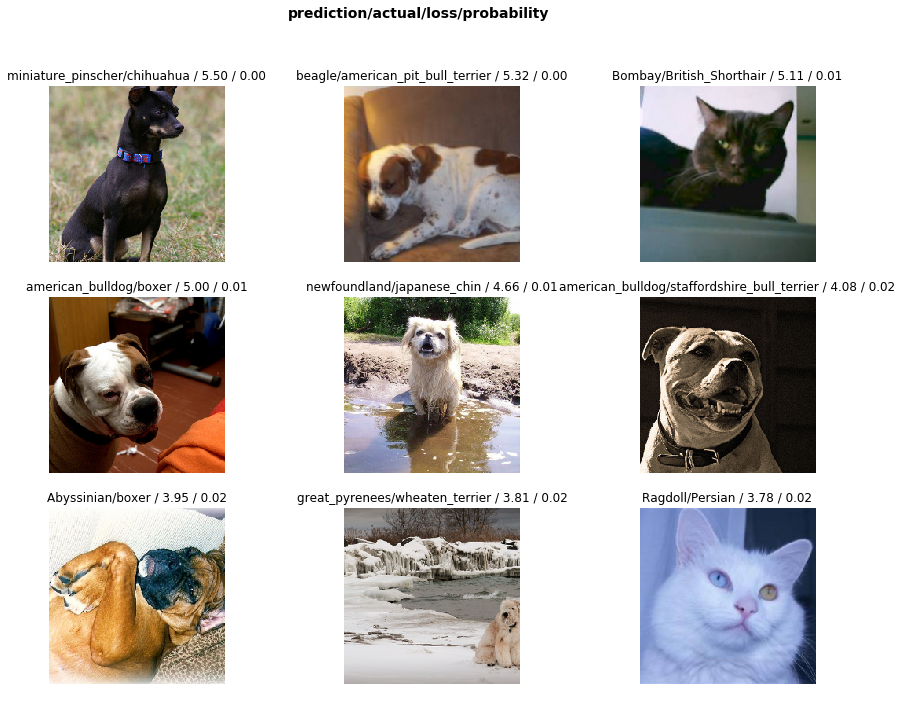

In [27]:
interp.plot_top_losses(9, figsize=(15,11))

In [28]:
doc(interp.plot_top_losses)

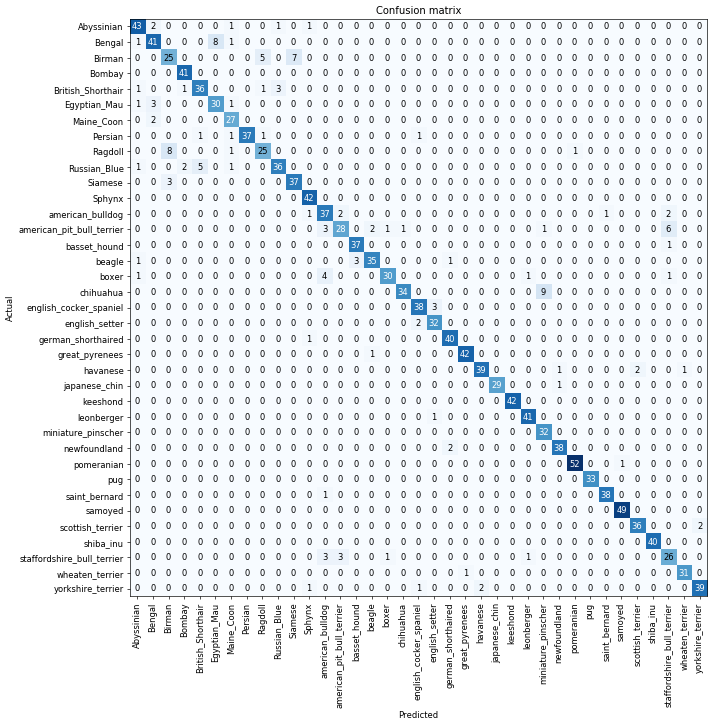

In [29]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [30]:
interp.most_confused(min_val=2)

[('chihuahua', 'miniature_pinscher', 9),
 ('Bengal', 'Egyptian_Mau', 8),
 ('Ragdoll', 'Birman', 8),
 ('Birman', 'Siamese', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Birman', 'Ragdoll', 5),
 ('Russian_Blue', 'British_Shorthair', 5),
 ('boxer', 'american_bulldog', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Siamese', 'Birman', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('beagle', 'basset_hound', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'beagle', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('havanese', 'scottish_terrier', 2),
 ('newf